# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.


In [1]:
from ema_workbench import (Model, RealParameter, ScalarOutcome)
from ema_workbench.util import ema_logging
from ema_workbench import Policy, perform_experiments
from problem_formulation import get_model_for_problem_formulation

import numpy as np
import matplotlib.pyplot as plt

In [3]:
ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(2)

In [4]:
n_scenarios = 10
n_policies = 5
results = perform_experiments(dike_model, n_scenarios, n_policies)

[MainProcess/INFO] performing 10 scenarios * 5 policies * 1 model(s) = 50 experiments
100%|██████████████████████████████████████████| 50/50 [02:59<00:00,  3.59s/it]
[MainProcess/INFO] experiments finished


In [6]:
results_copy = tuple(results)

In [4]:
from ema_workbench import MultiprocessingEvaluator, ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

n_scenarios = 10
n_policies = 5

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, n_policies)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 10 scenarios * 5 policies * 1 model(s) = 50 experiments
100%|██████████████████████████████████████████| 50/50 [01:40<00:00,  2.01s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


With the <code>MultiprocessingEvaluator</code> the code takes half the time (?) to run!

2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*

In [5]:
experiments, outcomes = results

In [6]:
cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)

3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability

In [7]:
outcomes

{'Expected Annual Damage': array([7.51506520e+06, 9.41247451e+08, 1.60456153e+06, 4.95478212e+07,
        4.51681608e+07, 4.69329275e+06, 3.73464201e+08, 1.16676760e+07,
        1.48986890e+07, 5.62429053e+06, 0.00000000e+00, 2.46102575e+06,
        0.00000000e+00, 3.35460928e+07, 0.00000000e+00, 6.74465811e+06,
        6.64769108e+07, 1.15398910e+07, 0.00000000e+00, 1.44269194e+06,
        4.15585405e+06, 1.68910723e+09, 2.29141356e+06, 2.67361717e+08,
        2.33379522e+07, 8.49748775e+07, 2.52495819e+08, 4.57266991e+07,
        1.06601836e+07, 5.28971207e+07, 0.00000000e+00, 1.86662326e+07,
        0.00000000e+00, 2.02449113e+07, 4.31686006e+05, 1.89698099e+06,
        2.35025033e+07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.91295564e+05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.95327239e+06]),
 'Dike Investment Costs': array([5.50802895e+08, 5.50802895e+08, 5.5

In [8]:
from ema_workbench.analysis import prim

data = outcomes['Expected Annual Damage']

y = data < 4 # we are creating the classification now?

prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8)
# we pass all the outcomes to the PRIM algorithm, the classification is done based on one of the outcomes?
box1 = prim_alg.find_box()

C:\Users\ludov\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 50 points remaining, containing 17 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.18, coverage: 0.5294117647058824, density: 1.0 restricted_dimensions: 4


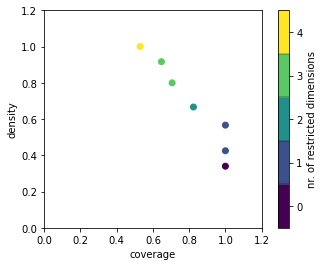

In [9]:
box1.show_tradeoff()
plt.show()

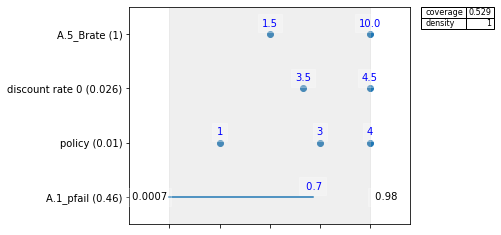

In [10]:
box1.inspect(style='graph')
plt.show()

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

In [11]:
from ema_workbench.analysis import dimensional_stacking

In [18]:
# dimensional stacking doesn't work if there are NaN values
cleaned_experiments = cleaned_experiments.fillna(0)

[MainProcess/INFO] model dropped from analysis because only a single category


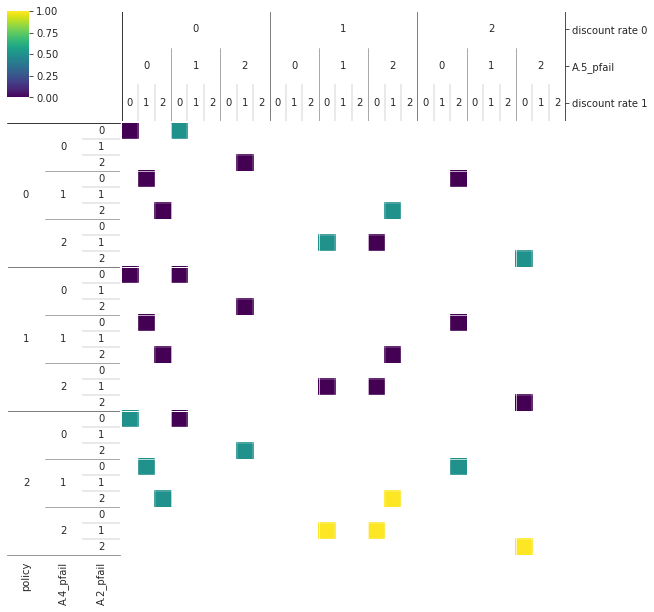

In [19]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
plt.show()

looking at this graph, we have a few white spaces, so there is an argument to be made that we should run quite a bit more than 1000 runs.

In [21]:
n_scenarios = 20
n_policies = 5

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, n_policies)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 20 scenarios * 5 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [03:05<00:00,  1.86s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


[MainProcess/INFO] model dropped from analysis because only a single category


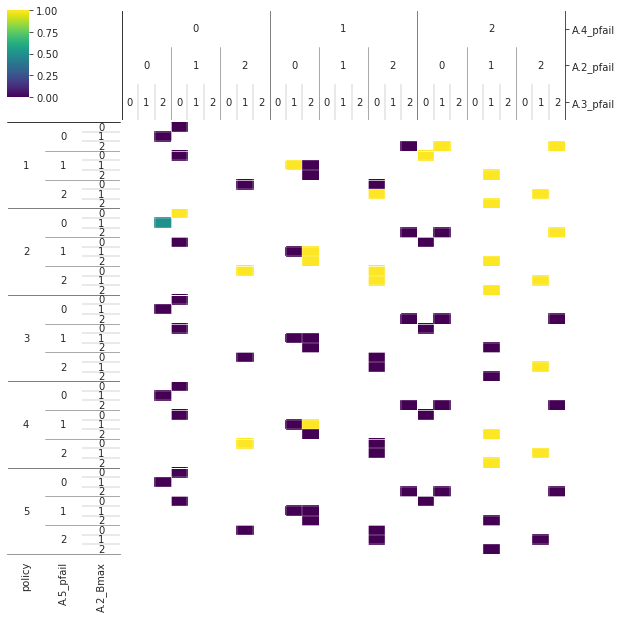

In [23]:
experiments, outcomes = results
cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)

data = outcomes['Expected Annual Damage']
y = data < 4

dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
plt.show()